# Mini Project - Job Salaries Dataset EDA

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter
import collections

## EDA - Exploring Data Variables

### 1. Overview 
Explore the overview of all the features present in the model

In [2]:
dsdata = pd.read_csv('new_ds_salaries.csv')
dsdata.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
dsdata.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain,employee_continentN,company_continentN
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,...,1,1,2,1,EUROPE,EUROPE,Scientist,Data science,0,0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,...,1,2,0,1,ASIA,ASIA,Scientist,Machine Learning,1,1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,1,GB,...,1,2,1,1,EUROPE,EUROPE,Engineer,Data science,0,0
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,...,0,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science,2,2
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,1,US,...,1,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning,2,2


In [3]:
dsdata.describe()

,work_year,salary,salary_in_usd,remote_ratio,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,employee_continentN,company_continentN
count,607.000000,6.070000e+02,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,2021.405272,3.240001e+05,112297.869852,1.418451,0.739703,1.401977,1.189456,1.004942,1.481054,1.469522
std,0.692133,1.544357e+06,70957.259411,0.814183,0.439158,0.785510,0.654021,0.226121,1.036887,0.972549
min,2020.000000,4.000000e+03,2859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,7.000000e+04,62726.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2022.000000,1.150000e+05,101570.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,2022.000000,1.650000e+05,150000.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
max,2022.000000,3.040000e+07,600000.000000,2.000000,1.000000,3.000000,2.000000,3.000000,5.000000,5.000000


In [4]:
dsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            607 non-null    int64 
 1   experience_level     607 non-null    object
 2   employment_type      607 non-null    object
 3   job_title            607 non-null    object
 4   salary               607 non-null    int64 
 5   salary_currency      607 non-null    object
 6   salary_in_usd        607 non-null    int64 
 7   employee_residence   607 non-null    object
 8   remote_ratio         607 non-null    int64 
 9   company_location     607 non-null    object
 10  company_size         607 non-null    object
 11  salary_group         607 non-null    object
 12  compare_avr_salary   607 non-null    int64 
 13  experience_levelN    607 non-null    int64 
 14  company_sizeN        607 non-null    int64 
 15  employment_typeN     607 non-null    int64 
 16  company_

### 2. Figure out which feature may contribute most to salary_in_usd

Since our numerical question main response variable is `salary_in_usd`, we would want to check for the coefficient values of all the variables to easily single out variables that may be related to `salary_in_usd`

In [5]:
dsdata.corr()

,work_year,salary,salary_in_usd,remote_ratio,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,employee_continentN,company_continentN
work_year,1.000000,-0.087577,0.170493,0.076314,0.260769,0.294759,-0.078764,-0.012819,0.176270,0.175274
salary,-0.087577,1.000000,-0.083906,-0.014608,-0.141071,-0.027517,0.079959,-0.002470,0.025698,0.059222
salary_in_usd,0.170493,-0.083906,1.000000,0.132122,0.617581,0.484233,0.151205,0.065747,0.314855,0.341945
remote_ratio,0.076314,-0.014608,0.132122,1.000000,0.106680,0.097784,-0.022070,0.015638,0.181417,0.187019
compare_avr_salary,0.260769,-0.141071,0.617581,0.106680,1.000000,0.432975,0.085801,0.029594,0.311678,0.313666
experience_levelN,0.294759,-0.027517,0.484233,0.097784,0.432975,1.000000,0.063511,0.081701,0.179552,0.221268
company_sizeN,-0.078764,0.079959,0.151205,-0.022070,0.085801,0.063511,1.000000,0.027133,-0.037282,0.010390
employment_typeN,-0.012819,-0.002470,0.065747,0.015638,0.029594,0.081701,0.027133,1.000000,0.017995,0.056964
employee_continentN,0.176270,0.025698,0.314855,0.181417,0.311678,0.179552,-0.037282,0.017995,1.000000,0.854026
company_continentN,0.175274,0.059222,0.341945,0.187019,0.313666,0.221268,0.010390,0.056964,0.854026,1.000000


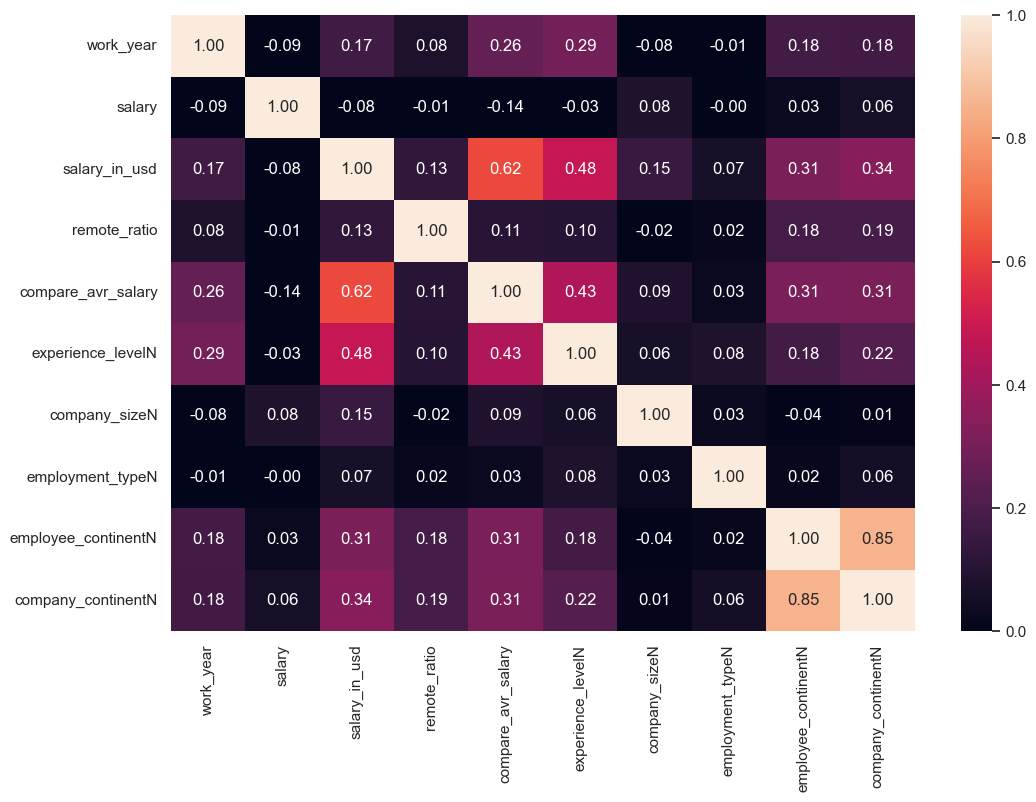

In [6]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(dsdata.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")
plt.show()

### 3. Explore the distribution of features

We want to see how our predictors are spread out across each catergories

And also for numerical values: how are the values being distributed?

- salary_group

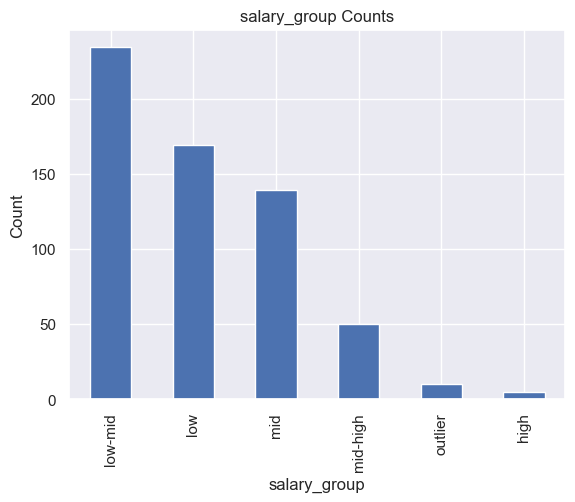

In [7]:
salary_group = dsdata['salary_group']
counts = salary_group.value_counts()
counts.plot(kind='bar')
plt.title('salary_group Counts')
plt.xlabel('salary_group')
plt.ylabel('Count')
plt.show()

- Domain

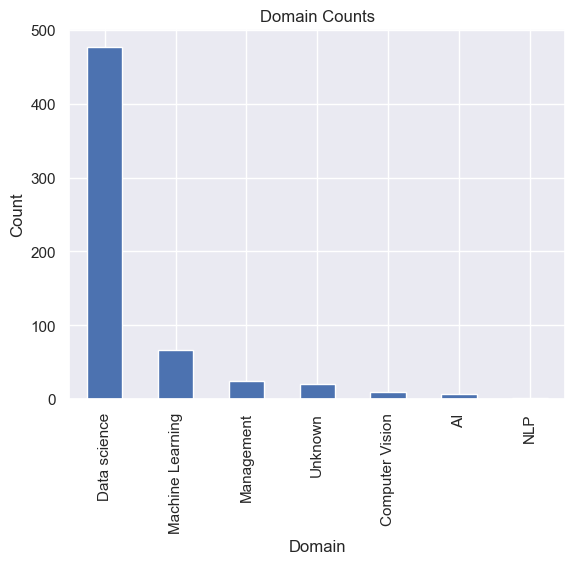

In [8]:
domain = dsdata['domain']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Domain Counts')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.show()

- company_continent

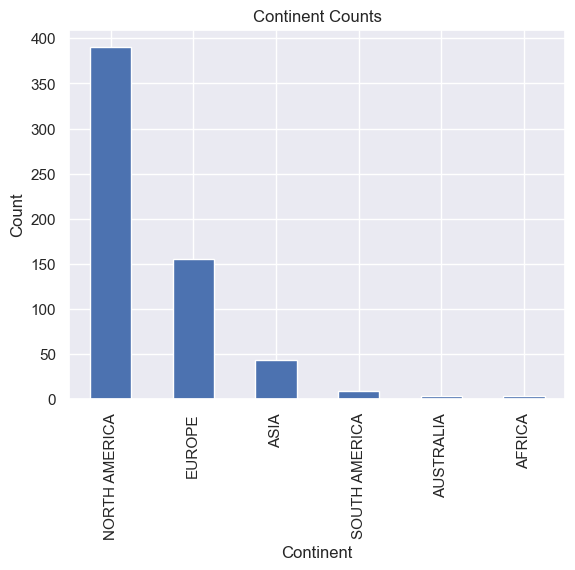

In [9]:
domain = dsdata['company_continent']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Continent Counts')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

- employee_continent

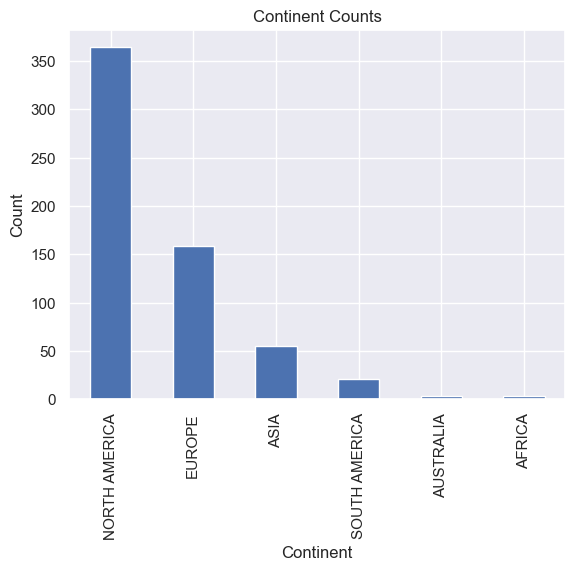

In [10]:
domain = dsdata['employee_continent']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Continent Counts')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

- job_type

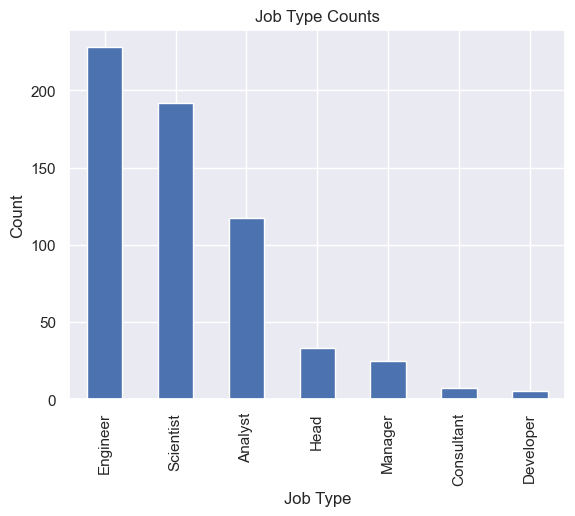

In [11]:
domain = dsdata['job_type']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Job Type Counts')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

- company_size

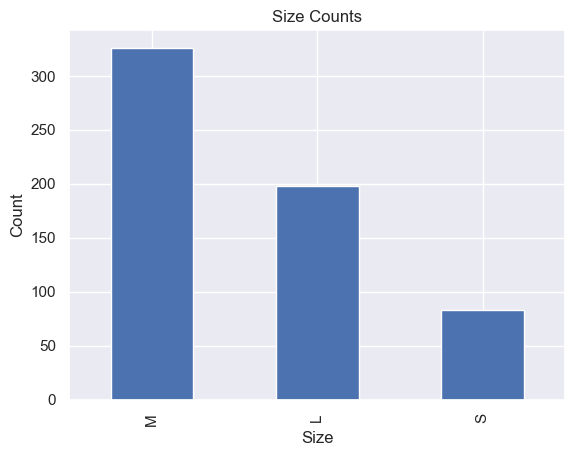

In [12]:
domain = dsdata['company_size']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Size Counts')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

- experience_level

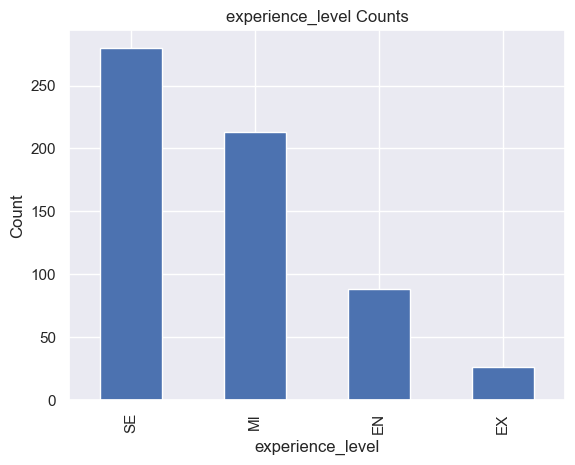

In [13]:
experience_level = dsdata['experience_level']
counts = experience_level.value_counts()
counts.plot(kind='bar')
plt.title('experience_level Counts')
plt.xlabel('experience_level')
plt.ylabel('Count')
plt.show()

- employment_type 

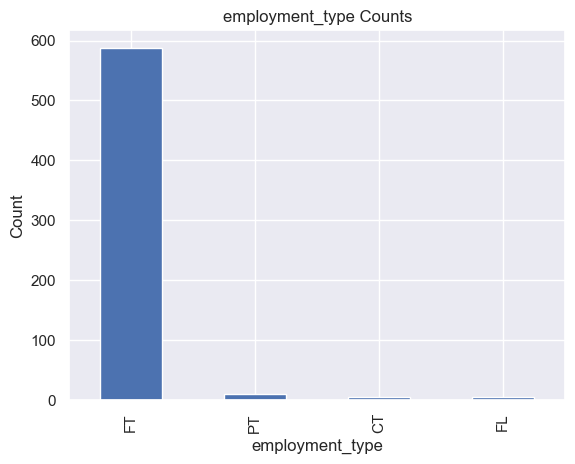

In [14]:
employment_type = dsdata['employment_type']
counts = employment_type.value_counts()
counts.plot(kind='bar')
plt.title('employment_type Counts')
plt.xlabel('employment_type')
plt.ylabel('Count')
plt.show()

- remote_ratio

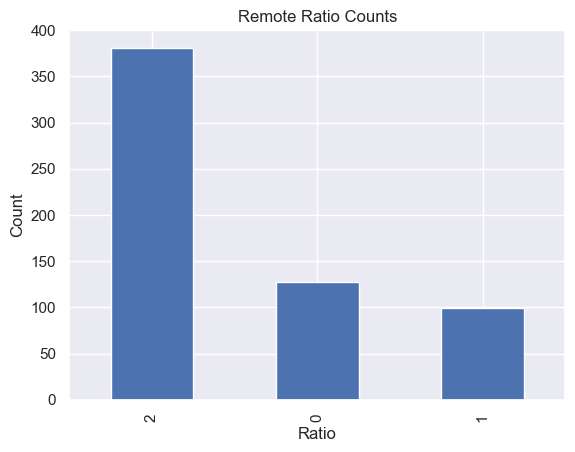

In [15]:
domain = dsdata['remote_ratio']
counts = domain.value_counts()
counts.plot(kind='bar')
plt.title('Remote Ratio Counts')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.show()

### 4. Explore the distribution of salary_in_usd according to other features

Using boxplot to see the `salary_in_usd`of each variable how it is being distributed

- Domain

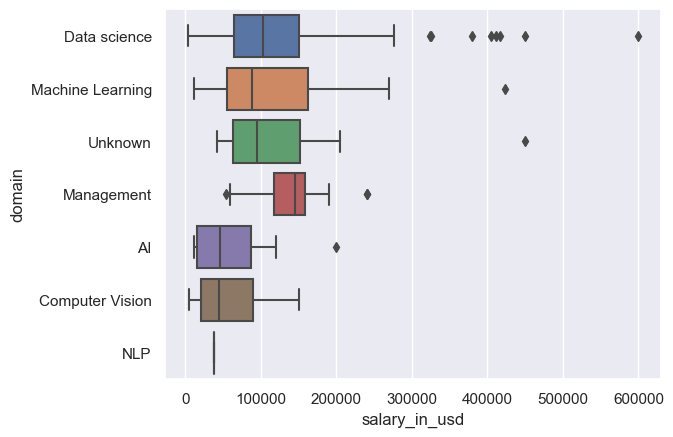

In [16]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='domain')
plt.show()

- company_continent

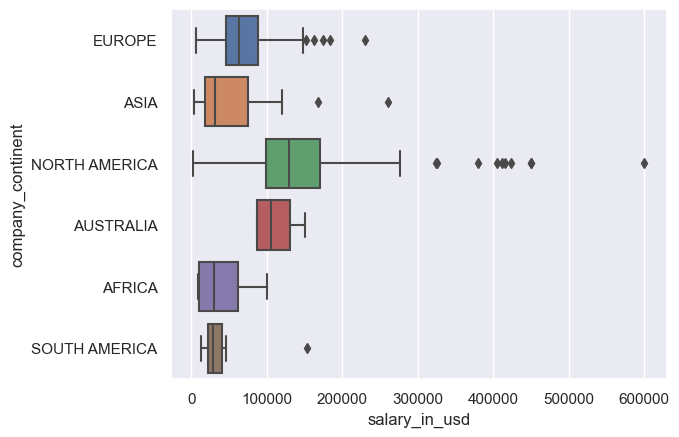

In [17]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='company_continent')
plt.show()

- employee_continent

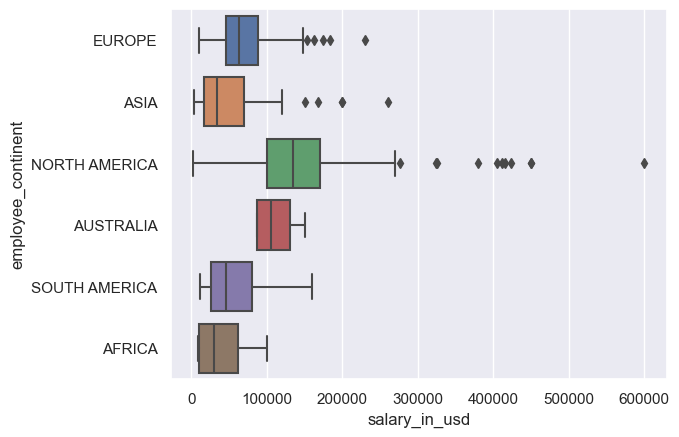

In [18]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='employee_continent')
plt.show()

- job_type

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_type'>

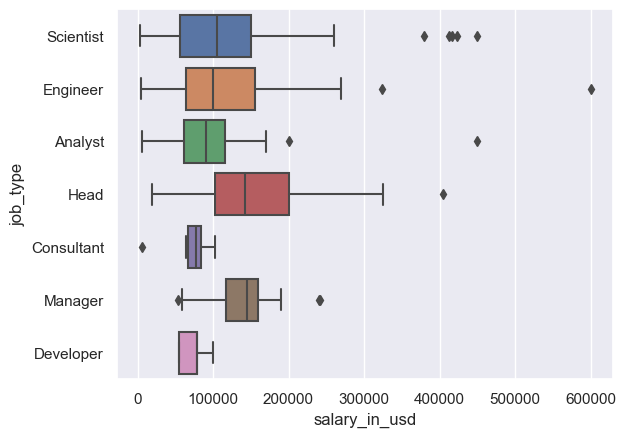

In [19]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='job_type')

- company_size

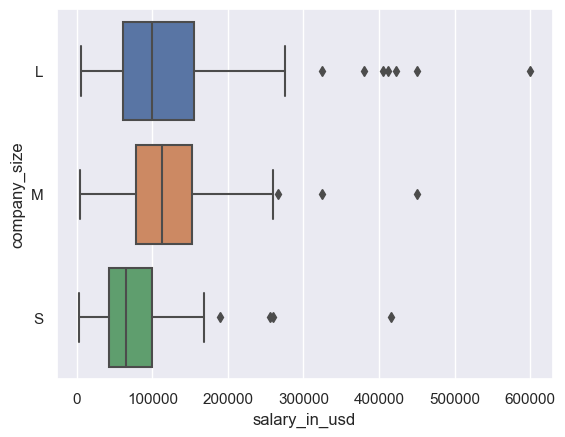

In [20]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='company_size', order=["L", "M", "S"])
plt.show()

It appears M and L is higher than S, generally.

- experience_level

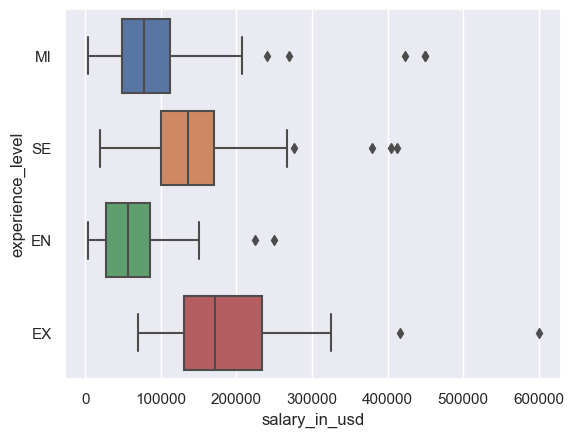

In [21]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='experience_level')
plt.show()

- employment_type 

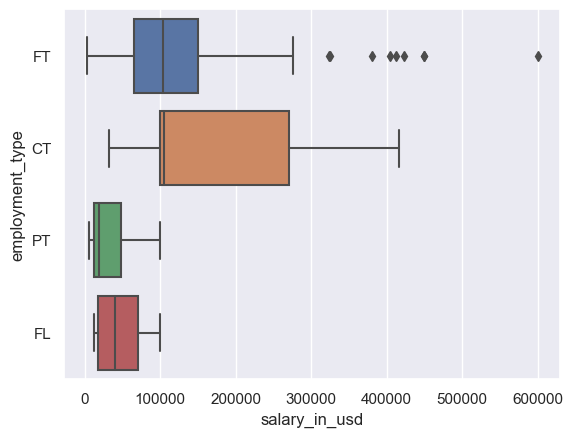

In [22]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='employment_type')
plt.show()

- remote ratio

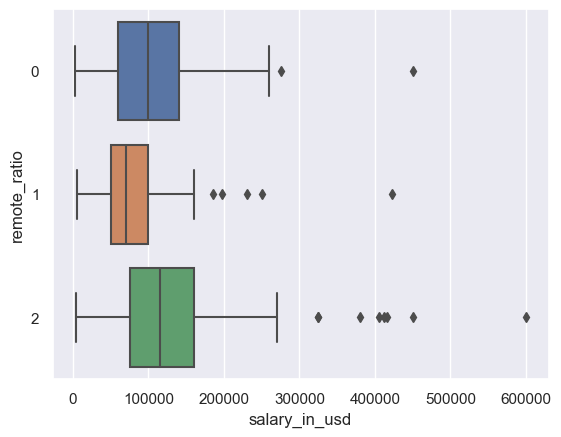

In [23]:
sb.boxplot(data=dsdata, x='salary_in_usd', y='remote_ratio', orient="h")
plt.show()

### 5. Explore the relationship between some features

To check whether there are any correlation between each predictor 

- remote_ratio and company_continent

In [25]:
remoteCompany = pd.DataFrame(dsdata[['remote_ratio','company_continent']])
remoteCompany.head()

,remote_ratio,company_continent
0,0,EUROPE
1,0,ASIA
2,1,EUROPE
3,0,NORTH AMERICA
4,1,NORTH AMERICA


In [26]:
remoteCompany = pd.get_dummies(remoteCompany)
remoteCompany.head()

,remote_ratio,company_continent_AFRICA,company_continent_ASIA,company_continent_AUSTRALIA,company_continent_EUROPE,company_continent_NORTH AMERICA,company_continent_SOUTH AMERICA
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0


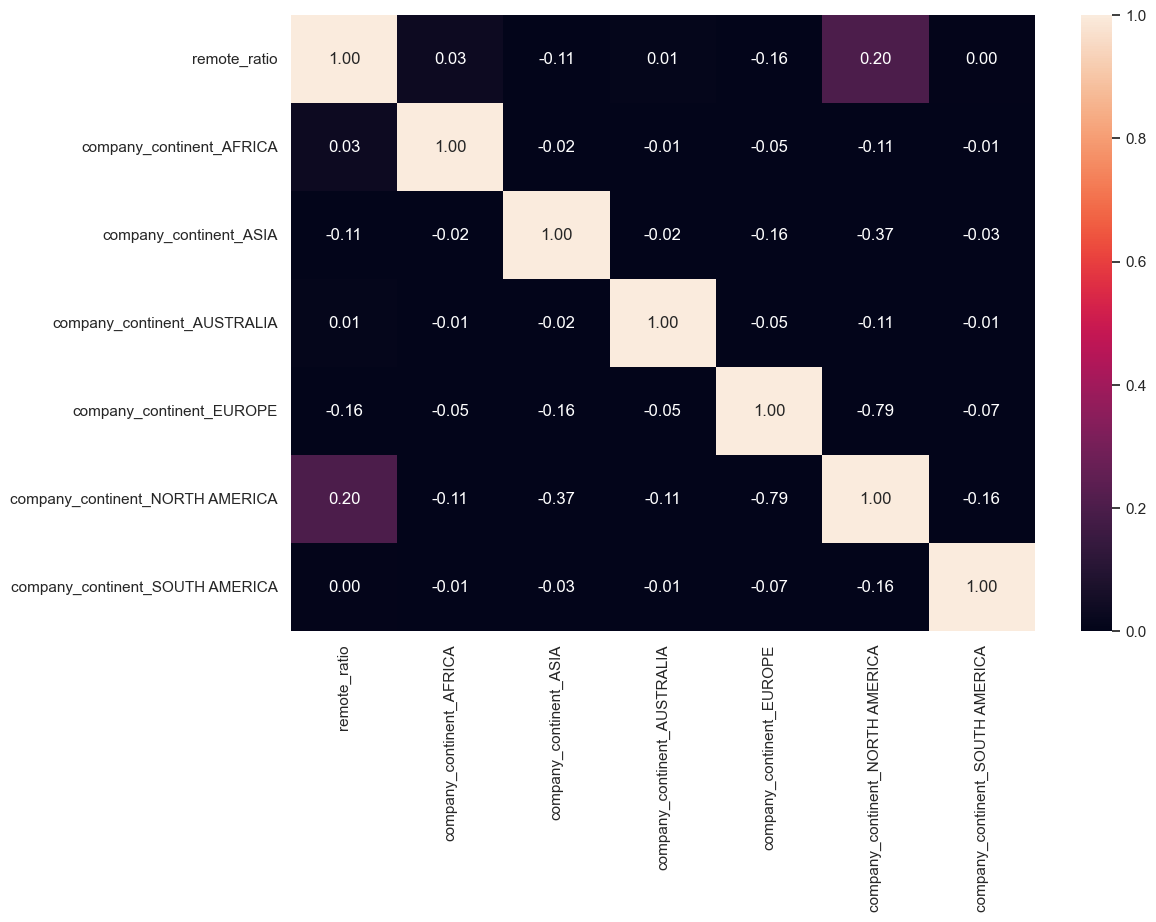

In [27]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(remoteCompany.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")
plt.show()

- remote_ratio and employee_continent

In [28]:
remoteEmployee = pd.DataFrame(dsdata[['remote_ratio','employee_continent']])
remoteEmployee.head()

,remote_ratio,employee_continent
0,0,EUROPE
1,0,ASIA
2,1,EUROPE
3,0,NORTH AMERICA
4,1,NORTH AMERICA


In [29]:
remoteEmployee = pd.get_dummies(remoteEmployee)
remoteEmployee.head()

,remote_ratio,employee_continent_AFRICA,employee_continent_ASIA,employee_continent_AUSTRALIA,employee_continent_EUROPE,employee_continent_NORTH AMERICA,employee_continent_SOUTH AMERICA
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0


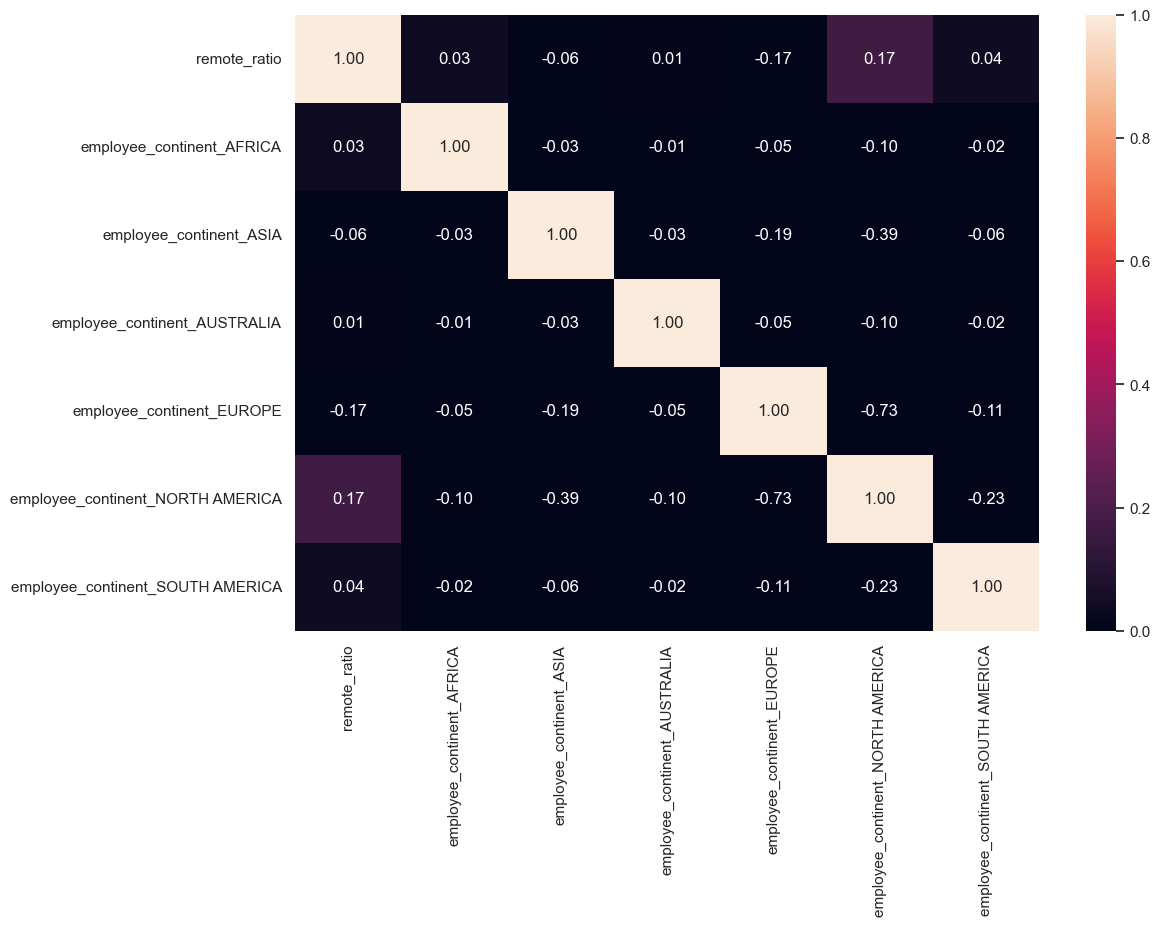

In [30]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(remoteEmployee.corr(), vmin = 0, vmax = 1, annot = True, fmt = ".2f")
plt.show()